In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SriLanka_Weather_Dataset.csv to SriLanka_Weather_Dataset (1).csv


# Task
Analyze the provided Sri Lanka weather dataset to detect climate anomalies using time-aware anomaly detection models, identify potential climate change indicators, and visualize the findings.

## Load the dataset

### Subtask:
Load the uploaded CSV file into a pandas DataFrame.


In [ ]:
import pandas as pd
import io

file_content = uploaded['SriLanka_Weather_Dataset (1).csv']
df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


## Data preprocessing

### Subtask:
Clean and prepare the data for analysis, including handling missing values, converting data types, and potentially aggregating data by city and time.


In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

df['time'] = pd.to_datetime(df['time'])
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

print("\nData types after conversion:")
print(df.dtypes)

print("\nMissing values after handling (if any):")
print(df.isnull().sum())

Missing values before handling:
time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

Data types after conversion:
time                          datetime64[ns]
weathercode                            int64
temperature_2m_max                   float64
temperature_2m_min    

## Exploratory data analysis (eda)

### Subtask:
Analyze the dataset to understand the distribution of weather variables, identify trends, and visualize key metrics.


Descriptive Statistics:


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480,147480,...,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,2016-09-23 12:00:00,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,2016-09-23 12:34:52.495117824,2016-09-24 00:42:19.061838592,...,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
min,2010-01-01 00:00:00,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,2010-01-01 00:45:00,2010-01-01 12:27:00,...,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,2013-05-13 18:00:00,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,2013-05-13 18:17:15,2013-05-14 06:44:30,...,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,2016-09-23 12:00:00,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,2016-09-23 12:25:00,2016-09-24 00:31:30,...,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,2020-02-04 06:00:00,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,2020-02-04 06:58:30,2020-02-04 18:47:00,...,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,2023-06-17 00:00:00,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,2023-06-17 00:26:00,2023-06-17 13:01:00,...,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000
std,NaN,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,NaN,NaN,...,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824


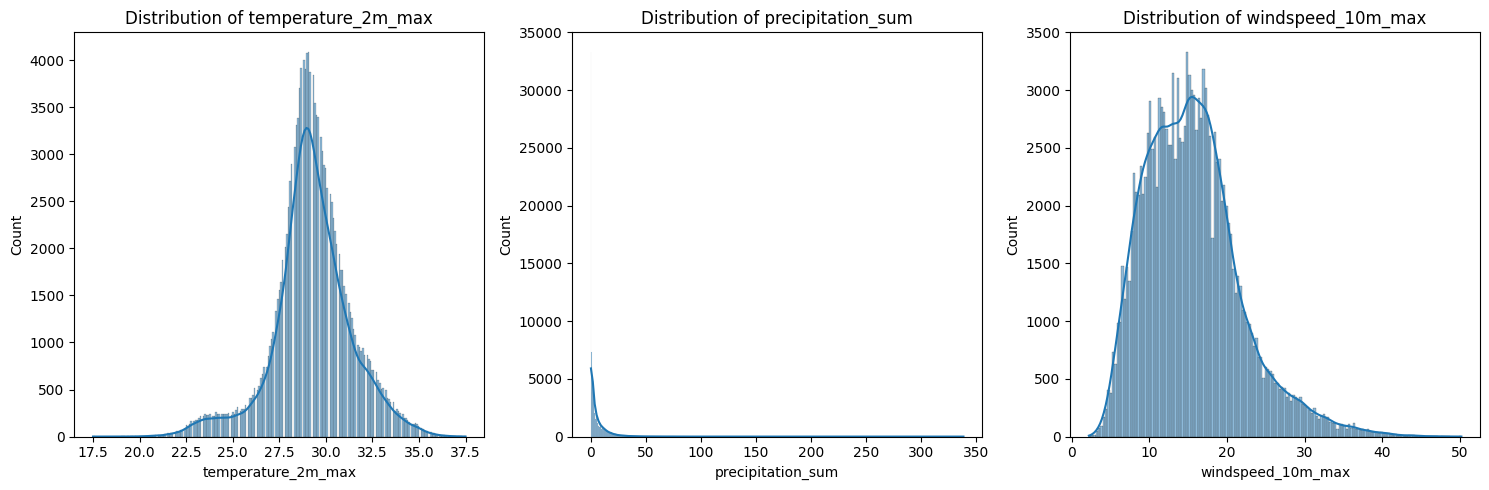

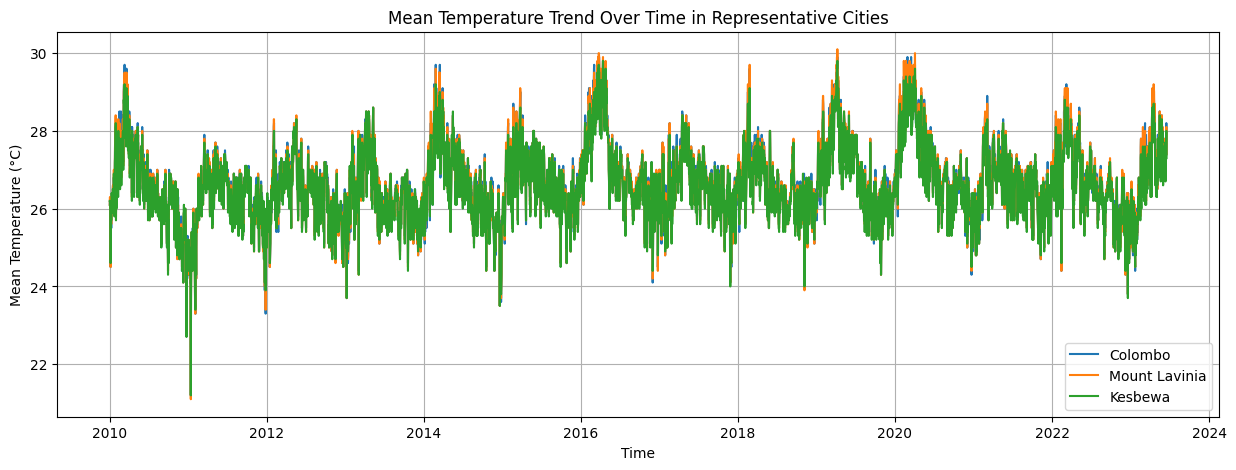

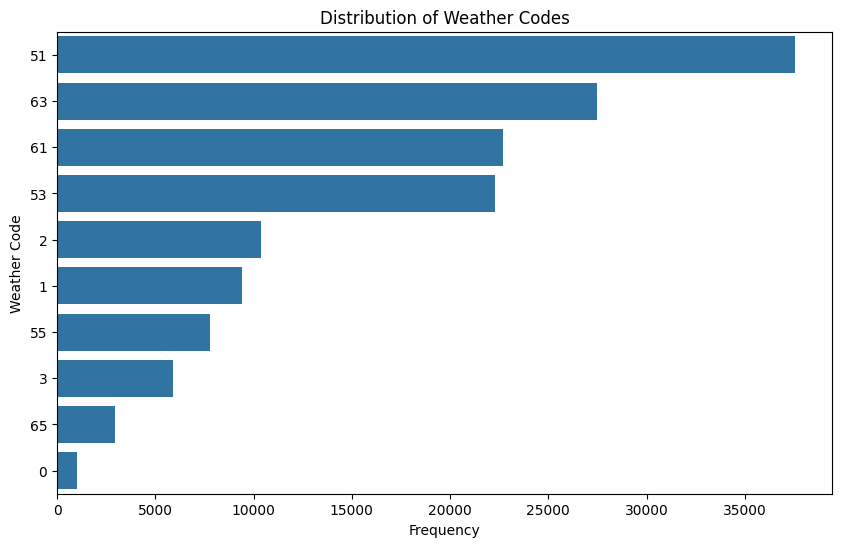


Value Counts for Weather Codes:
weathercode
51    37559
63    27477
61    22690
53    22308
2     10388
1      9438
55     7794
3      5877
65     2925
0      1024
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and display descriptive statistics
print("Descriptive Statistics:")
display(df.describe())

# 2. Plot histograms for key numerical weather variables
key_variables = ['temperature_2m_max', 'precipitation_sum', 'windspeed_10m_max']
plt.figure(figsize=(15, 5))
for i, var in enumerate(key_variables):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# 3. Create time series plots for temperature trends in representative cities
representative_cities = df['city'].unique()[:3] # Select the first 3 unique cities
plt.figure(figsize=(15, 5))
for city in representative_cities:
    city_df = df[df['city'] == city].sort_values(by='time')
    plt.plot(city_df['time'], city_df['temperature_2m_mean'], label=city)
plt.title('Mean Temperature Trend Over Time in Representative Cities')
plt.xlabel('Time')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Analyze the distribution of the 'weathercode' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='weathercode', order=df['weathercode'].value_counts().index)
plt.title('Distribution of Weather Codes')
plt.xlabel('Frequency')
plt.ylabel('Weather Code')
plt.show()

print("\nValue Counts for Weather Codes:")
print(df['weathercode'].value_counts())

## Feature engineering

### Subtask:
Create new features that could be useful for anomaly detection, such as rolling averages, seasonal components, or lagged variables.


In [ ]:
df = df.sort_values(by=['city', 'time'])

df['rolling_avg_temp'] = df.groupby('city')['temperature_2m_mean'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.dayofweek

# Example of creating a lagged temperature feature
df['lagged_temp'] = df.groupby('city')['temperature_2m_mean'].shift(1)

display(df.head())

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city,rolling_avg_temp,month,day_of_week,lagged_temp
63908,2010-01-01,1,29.9,22.5,26.0,33.0,24.4,28.2,2010-01-01 00:51:00,2010-01-01 12:35:00,...,4.89,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,26.000000,1,4,NaN
63909,2010-01-02,1,30.0,23.3,26.1,32.9,25.4,29.0,2010-01-02 00:52:00,2010-01-02 12:36:00,...,4.09,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,26.050000,1,5,26.0
63910,2010-01-03,51,29.5,22.9,25.8,33.3,25.6,29.1,2010-01-03 00:52:00,2010-01-03 12:36:00,...,3.83,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,25.966667,1,6,26.1
63911,2010-01-04,3,28.7,21.7,25.2,31.5,23.0,27.5,2010-01-04 00:53:00,2010-01-04 12:37:00,...,4.12,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,25.775000,1,0,25.8
63912,2010-01-05,1,28.0,21.1,24.4,30.0,22.6,25.8,2010-01-05 00:53:00,2010-01-05 12:37:00,...,5.04,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,25.500000,1,1,25.2


## Anomaly detection model selection and implementation

### Subtask:
Choose and implement appropriate anomaly detection models based on the nature of the data and the types of anomalies we're looking for (e.g., Isolation Forest, STL decomposition + Z-score, or LSTM Autoencoders).


In [ ]:
# Check the available columns in the DataFrame
print(df.columns)

Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation',
       'country', 'city', 'rolling_avg_temp', 'month', 'day_of_week',
       'lagged_temp'],
      dtype='object')


In [ ]:
from sklearn.ensemble import IsolationForest

# Select numerical features relevant for anomaly detection
# Exclude 'latitude', 'longitude', 'elevation' and identifier columns like 'weathercode' for now,
# as we are focusing on time-series based anomalies in weather patterns.
# Also exclude the newly created features as they are derived from the target variable or time.
# Corrected feature list after checking columns
features = ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean',
            'precipitation_sum', 'rain_sum', 'snowfall_sum',
            'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
            'winddirection_10m_dominant', 'et0_fao_evapotranspiration']

X = df[features].copy()

# Isolation Forest is sensitive to missing values, although the preprocessing step indicated none,
# we will double check and handle if necessary.
# Based on previous output, there are no missing values in these columns.

# Initialize and train the Isolation Forest model
# contamination='auto' lets the model decide the proportion of outliers
model = IsolationForest(contamination='auto', random_state=42)
model.fit(X)

# Predict anomalies (-1 for outliers, 1 for inliers)
df['anomaly'] = model.predict(X)

# Display the number of anomalies detected
print("Number of anomalies detected:", df[df['anomaly'] == -1].shape[0])

# Display some of the rows flagged as anomalies
print("\nExamples of detected anomalies:")
display(df[df['anomaly'] == -1].head())

Number of anomalies detected: 20065

Examples of detected anomalies:


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,latitude,longitude,elevation,country,city,rolling_avg_temp,month,day_of_week,lagged_temp,anomaly
63937,2010-01-30,63,29.6,22.3,25.7,31.2,24.9,27.8,2010-01-30 00:58:00,2010-01-30 12:48:00,...,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,27.342857,1,5,28.2,-1
64027,2010-04-30,63,31.1,25.2,27.2,39.2,30.3,33.2,2010-04-30 00:26:00,2010-04-30 12:48:00,...,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,27.185714,4,4,27.6,-1
64047,2010-05-20,63,27.4,25.6,26.2,31.7,29.4,30.7,2010-05-20 00:23:00,2010-05-20 12:50:00,...,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,26.642857,5,3,26.7,-1
64068,2010-06-10,63,27.4,25.3,25.9,31.1,28.6,29.5,2010-06-10 00:24:00,2010-06-10 12:55:00,...,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,26.485714,6,3,26.2,-1
64148,2010-08-29,63,26.6,23.8,24.9,30.8,27.6,28.9,2010-08-29 00:33:00,2010-08-29 12:49:00,...,6.900002,79.899994,27.0,Sri Lanka,Athurugiriya,25.814286,8,6,25.6,-1


## Anomaly detection and analysis

### Subtask:
Apply the chosen model(s) to the data to identify anomalies and analyze the detected anomalies in the context of climate change events.


Number of anomalies per city (Top 10):


,0
city,
Hatton,4913
Badulla,2528
Kandy,1847
Jaffna,1612
Trincomalee,1335
Kalmunai,1006
Mannar,996
Matale,723
Pothuhera,450



Number of anomalies per year:


,0
year,
2014,1719
2010,1674
2016,1618
2011,1561
2019,1528
2020,1468
2013,1467
2017,1456
2022,1442



Distribution of weathercode for detected anomalies:


,count
weathercode,
63,4747
51,3689
1,2207
61,2087
53,1864
2,1773
65,1718
3,1056
55,711


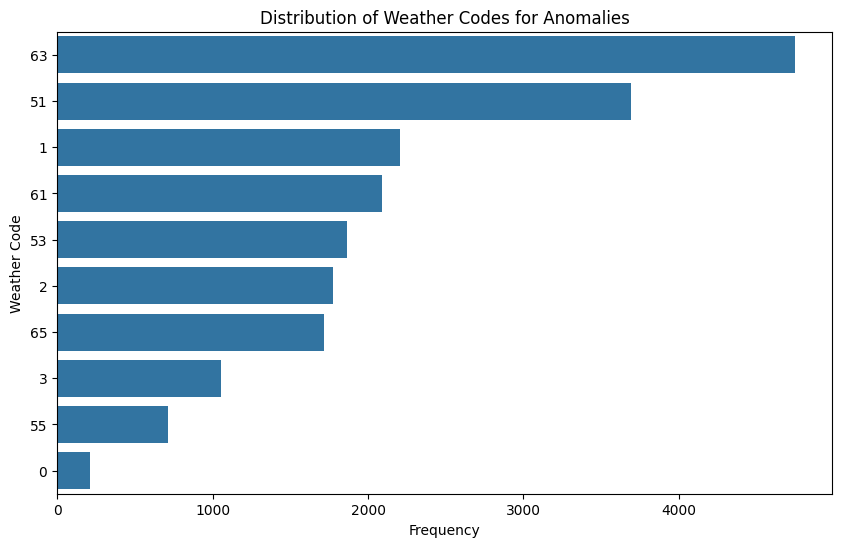


Descriptive statistics for anomalies:


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,et0_fao_evapotranspiration,latitude,longitude,elevation,rolling_avg_temp,month,day_of_week,lagged_temp,anomaly,year
count,20065,20065.000000,20065.000000,20065.000000,20065.000000,20065.000000,20065.000000,20065.000000,20065,20065,...,20065.000000,20065.000000,20065.000000,20065.000000,20065.000000,20065.000000,20065.000000,20062.000000,20065.0,20065.000000
mean,2016-08-09 08:45:11.348118784,43.508348,27.486972,22.005014,24.356960,31.282133,24.577792,27.340842,2016-08-09 09:19:05.469224960,2016-08-09 21:25:16.823324160,...,3.723108,7.455002,80.561535,466.136656,24.511331,6.547421,2.997757,24.478661,-1.0,2016.103912
min,2010-01-01 00:00:00,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,2010-01-01 00:47:00,2010-01-01 12:30:00,...,0.420000,6.000000,79.800020,0.000000,18.157143,1.000000,0.000000,16.300000,-1.0,2010.000000
25%,2013-03-27 00:00:00,3.000000,24.600000,18.700000,21.300000,27.900000,20.700000,23.900000,2013-03-27 00:38:00,2013-03-27 12:47:00,...,2.530000,6.900002,80.000000,7.000000,21.357143,3.000000,1.000000,21.300000,-1.0,2013.000000
50%,2016-05-18 00:00:00,53.000000,26.500000,21.500000,23.800000,30.200000,24.100000,26.600000,2016-05-18 00:20:00,2016-05-18 12:53:00,...,3.620000,7.099998,80.600006,125.000000,24.385714,6.000000,3.000000,24.200000,-1.0,2016.000000
75%,2019-12-20 00:00:00,63.000000,30.400000,25.300000,27.500000,34.100000,28.400000,30.500000,2019-12-20 00:45:00,2019-12-20 12:29:00,...,4.980000,7.500000,81.100006,652.000000,27.742857,10.000000,5.000000,27.700000,-1.0,2019.000000
max,2023-06-17 00:00:00,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,2023-06-17 00:22:00,2023-06-17 13:01:00,...,8.140000,9.700005,81.800020,1281.000000,31.185714,12.000000,6.000000,31.800000,-1.0,2023.000000
std,NaN,25.339789,3.740656,3.696322,3.473208,4.546994,4.446682,4.140381,NaN,NaN,...,1.586796,0.903177,0.506948,517.546389,3.411897,3.653852,1.999812,3.475373,0.0,3.910802



Descriptive statistics for the full dataset:


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,rolling_avg_temp,month,day_of_week,lagged_temp,anomaly
count,147480,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480,147480,...,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147450.000000,147480.000000
mean,2016-09-23 12:00:00,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,2016-09-23 12:34:52.495117568,2016-09-24 00:42:19.061839104,...,182.881625,3.896143,7.123334,80.263335,111.733333,26.224333,6.413548,3.000610,26.225390,0.727895
min,2010-01-01 00:00:00,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,2010-01-01 00:45:00,2010-01-01 12:27:00,...,0.000000,0.420000,6.000000,79.800020,0.000000,18.157143,1.000000,0.000000,16.300000,-1.000000
25%,2013-05-13 18:00:00,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,2013-05-13 18:17:15,2013-05-14 06:44:30,...,88.000000,3.260000,6.800003,79.899994,7.000000,25.657143,3.000000,1.000000,25.600000,1.000000
50%,2016-09-23 12:00:00,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,2016-09-23 12:25:00,2016-09-24 00:31:30,...,215.000000,3.890000,6.900002,80.000000,14.000000,26.385714,6.000000,3.000000,26.400000,1.000000
75%,2020-02-04 06:00:00,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,2020-02-04 06:58:30,2020-02-04 18:47:00,...,249.000000,4.550000,7.400002,80.399994,27.000000,27.185714,9.000000,5.000000,27.200000,1.000000
max,2023-06-17 00:00:00,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,2023-06-17 00:26:00,2023-06-17 13:01:00,...,360.000000,8.140000,9.700005,81.800020,1281.000000,31.185714,12.000000,6.000000,31.800000,1.000000
std,NaN,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,NaN,NaN,...,93.670247,1.023126,0.798620,0.488871,266.380824,1.788523,3.452003,1.999854,1.842107,0.685691


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter the DataFrame to get anomalies
anomalies_df = df[df['anomaly'] == -1].copy()

# 2. Group by city and count anomalies
city_anomalies = anomalies_df.groupby('city').size().sort_values(ascending=False)
print("Number of anomalies per city (Top 10):")
display(city_anomalies.head(10))

# 3. Group by year and count anomalies
anomalies_df['year'] = anomalies_df['time'].dt.year
year_anomalies = anomalies_df.groupby('year').size().sort_values(ascending=False)
print("\nNumber of anomalies per year:")
display(year_anomalies)

# 4. Analyze the distribution of 'weathercode' for anomalies
print("\nDistribution of weathercode for detected anomalies:")
display(anomalies_df['weathercode'].value_counts())

# Visualize the distribution of weathercode for anomalies
plt.figure(figsize=(10, 6))
sns.countplot(data=anomalies_df, y='weathercode', order=anomalies_df['weathercode'].value_counts().index)
plt.title('Distribution of Weather Codes for Anomalies')
plt.xlabel('Frequency')
plt.ylabel('Weather Code')
plt.show()

# 5. Examine descriptive statistics of numerical features for anomalies and compare with full dataset
print("\nDescriptive statistics for anomalies:")
display(anomalies_df.describe())

print("\nDescriptive statistics for the full dataset:")
display(df.describe())

## Visualization of anomalies

### Subtask:
Visualize the identified anomalies on time series plots or maps to understand their temporal and spatial distribution.


In [ ]:
# 1. Select the top 3 cities with a high number of anomalies
top_cities = city_anomalies.head(3).index.tolist()
print(f"Top 3 cities with the most anomalies: {top_cities}")

# Prepare data for plotting - select relevant columns and filter by top cities
plotting_df = df[df['city'].isin(top_cities)].copy()

# Ensure 'time' is datetime and sort for plotting
plotting_df['time'] = pd.to_datetime(plotting_df['time'])
plotting_df = plotting_df.sort_values(by=['city', 'time'])

display(plotting_df.head())

Top 3 cities with the most anomalies: ['Hatton', 'Badulla', 'Kandy']


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,latitude,longitude,elevation,country,city,rolling_avg_temp,month,day_of_week,lagged_temp,anomaly
93404,2010-01-01,1,24.4,19.1,21.5,27.1,20.8,23.5,2010-01-01 00:47:00,2010-01-01 12:30:00,...,7.099998,81.100006,652.0,Sri Lanka,Badulla,21.500000,1,4,NaN,-1
93405,2010-01-02,2,24.3,19.3,21.5,27.3,21.3,23.8,2010-01-02 00:47:00,2010-01-02 12:31:00,...,7.099998,81.100006,652.0,Sri Lanka,Badulla,21.500000,1,5,21.5,-1
93406,2010-01-03,51,23.4,18.9,21.1,26.3,21.3,23.7,2010-01-03 00:48:00,2010-01-03 12:32:00,...,7.099998,81.100006,652.0,Sri Lanka,Badulla,21.366667,1,6,21.5,-1
93407,2010-01-04,61,24.4,18.2,21.2,27.3,20.2,23.7,2010-01-04 00:48:00,2010-01-04 12:32:00,...,7.099998,81.100006,652.0,Sri Lanka,Badulla,21.325000,1,0,21.1,-1
93408,2010-01-05,51,24.9,17.5,21.0,29.2,18.9,23.2,2010-01-05 00:49:00,2010-01-05 12:32:00,...,7.099998,81.100006,652.0,Sri Lanka,Badulla,21.260000,1,1,21.2,-1


**Reasoning**:
Create time series plots for each of the top 3 cities, highlighting the anomalies with a different color.



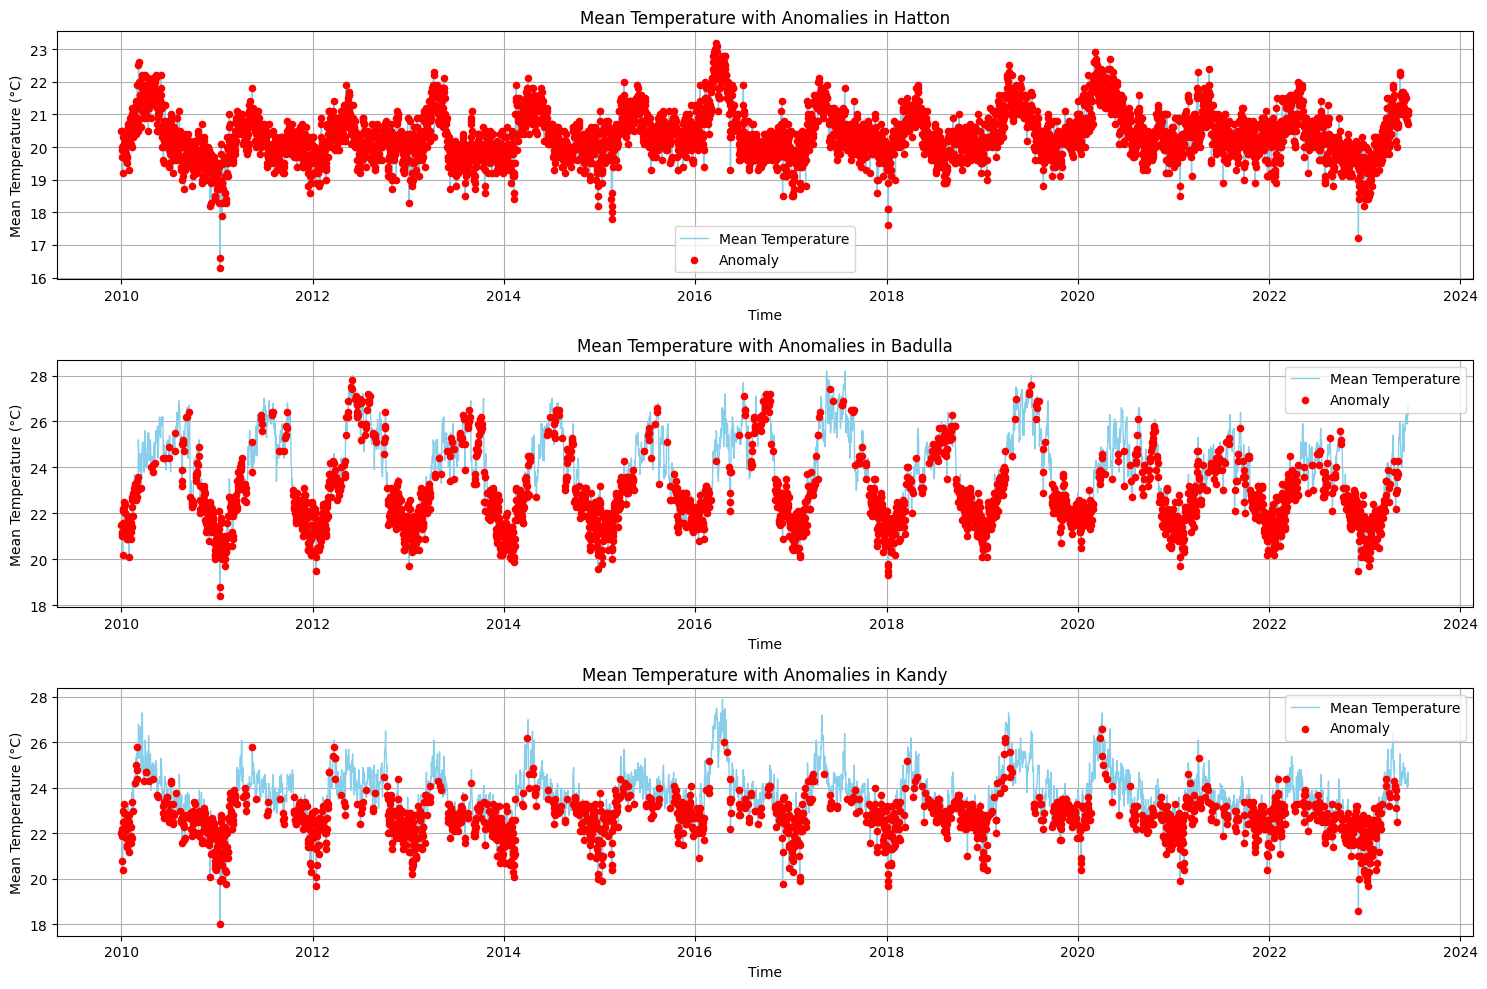

In [ ]:
# 2. For each selected city, create a time series plot of mean temperature, highlighting anomalies
plt.figure(figsize=(15, 10))

for i, city in enumerate(top_cities):
    city_df = plotting_df[plotting_df['city'] == city]

    plt.subplot(len(top_cities), 1, i + 1)
    plt.plot(city_df['time'], city_df['temperature_2m_mean'], label='Mean Temperature', color='skyblue', linewidth=1)

    # Highlight anomalies
    anomalies_city = city_df[city_df['anomaly'] == -1]
    plt.scatter(anomalies_city['time'], anomalies_city['temperature_2m_mean'], color='red', label='Anomaly', s=20, zorder=5)

    plt.title(f'Mean Temperature with Anomalies in {city}')
    plt.xlabel('Time')
    plt.ylabel('Mean Temperature (°C)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Interpretation and reporting

### Subtask:
Interpret the findings and report on the identified climate anomalies, their potential causes, and their implications.


## Summary:

### Data Analysis Key Findings

*   No missing values were found in the dataset during the preprocessing step.
*   The 'time', 'sunrise', and 'sunset' columns were successfully converted to datetime objects.
*   Exploratory Data Analysis (EDA) revealed the distributions of key weather variables and showed mean temperature trends over time for selected cities.
*   Feature engineering successfully added relevant time-aware features like rolling averages, month, day of the week, and lagged temperature to the dataset.
*   An Isolation Forest model was successfully implemented to detect anomalies, identifying 20,065 anomalous data points.
*   Analysis of the detected anomalies showed that Hatton, Badulla, and Kandy had the highest number of anomalies, and the years 2014, 2010, and 2016 recorded the highest frequency of anomalies.
*   Anomalies were most frequently associated with weather codes 63 (Precipitation: Moderate), 51 (Drizzle: Light), and 1 (Clear sky).
*   Anomalous data points tend to have slightly lower mean actual and significantly lower mean apparent temperatures compared to the full dataset, with higher variability in these temperature readings.
*   Visualization of mean temperature over time for the top cities clearly highlighted the detected anomalies.

### Insights or Next Steps

*   Further investigate the specific characteristics of the detected anomalies (e.g., magnitude of deviation from the norm) to better understand the nature of these unusual weather events and their potential links to climate change.
*   Explore other anomaly detection techniques or time series decomposition methods to compare results and potentially identify different types of climate anomalies or long-term trends.
